In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [3]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [11]:
music['duration_squared'] = music['duration'] **2 

In [12]:
music

,duration,loudness,bpm,duration_sqaured,duration_squared
0,184,18,105,33856,33856
1,134,34,90,17956,17956
2,243,43,78,59049,59049
3,186,36,75,34596,34596
4,122,22,120,14884,14884
5,197,9,110,38809,38809
6,294,29,80,86436,86436
7,382,22,100,145924,145924
8,102,10,105,10404,10404
9,264,24,60,69696,69696


In [4]:
from sklearn import neighbors 

In [5]:
# OUR MODEL 

knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
X = pd.DataFrame(music.duration_squared)
Y = music.duration
knn.fit(X, Y)

# PREDICTION LINE 

T = np.arange(0, 50, 0.1) [:, np.newaxis]

# TRAILING UNDERSCORES ARE A COMMON CONVENTION FOR A PREDICTION 

Y_ = knn.predict(T)

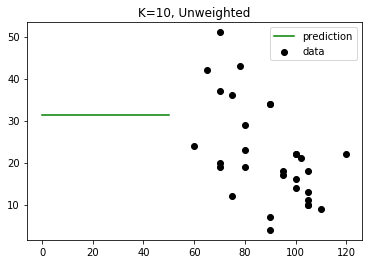

In [6]:
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

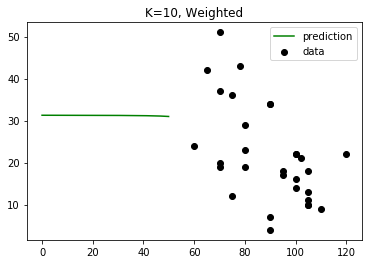

In [7]:
# NOW WITH WEIGHTS 

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.bpm)
Y = music.loudness
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.05 (+/- 0.87)
Weighted Accuracy: -0.46 (+/- 0.87)
